In [1]:
import numpy as np 
import pandas as pd 
import os
import csv 
import matplotlib.pyplot as plt

# Open the CSV file using the csv module
with open('Environment_Temperature_change_E_All_Data_NOFLAG.csv', mode='r', encoding='ISO-8859-1') as file:

    csv_reader = csv.reader(file)  
    
    # Skip the header row
    header = next(csv_reader, None)  
    
    # Load the data from csv_reader into a list
    data = [row for row in csv_reader] 

# Convert the list to a Pandas DataFrame
df = pd.DataFrame(data, columns=header)

# Display the first few rows
print(df.head())


  Area Code         Area Months Code    Months Element Code  \
0         2  Afghanistan        7001   January         7271   
1         2  Afghanistan        7001   January         6078   
2         2  Afghanistan        7002  February         7271   
3         2  Afghanistan        7002  February         6078   
4         2  Afghanistan        7003     March         7271   

              Element Unit      Y1961     Y1962     Y1963  ...     Y2010  \
0  Temperature change   °C   0.777000  0.062000  2.744000  ...  3.601000   
1  Standard Deviation   °C   1.950000  1.950000  1.950000  ...  1.950000   
2  Temperature change   °C  -1.743000  2.465000  3.919000  ...  1.212000   
3  Standard Deviation   °C   2.597000  2.597000  2.597000  ...  2.597000   
4  Temperature change   °C   0.516000  1.336000  0.403000  ...  3.390000   

      Y2011      Y2012     Y2013      Y2014      Y2015     Y2016      Y2017  \
0  1.179000  -0.583000  1.233000   1.755000   1.943000  3.416000   1.201000   
1  1.9

In [5]:
# Open the CSV file using the csv module
with open('FAOSTAT_data_11-24-2020 (2).csv', mode='r') as file:
    csv_reader = csv.reader(file)
    
    # Skip the header row
    header = next(csv_reader, None)
    
    # Load the data from csv_reader into a list
    data1 = [row for row in csv_reader]

In [6]:
import pandas as pd

def create_meteorological_year(df):
    # Extract the available years from the column names (e.g., 'Y1960')
    years = [col for col in df.columns if col.startswith('Y')]

    meteo_year_data = pd.DataFrame()

    for i in range(len(years) - 1):
        # Get current and next year (excluding 'Y')
        year = years[i][1:]  # Get the year as a string, removing 'Y'
        next_year = years[i + 1][1:]  # Next year for the November cutoff
        
        # Extract December of the previous year
        dec_prev_year = df[df['Months'] == 'December'][f'Y{year}']
        
        # Extract January to November of the current year
        jan_to_nov_current_year = df[df['Months'].isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November'])][f'Y{next_year}']

        # Concatenate the December and the rest of the months
        meteo_year = pd.concat([dec_prev_year.reset_index(drop=True), jan_to_nov_current_year.reset_index(drop=True)], axis=0)

        # Add the reorganized year to a new DataFrame
        meteo_year_data[f'Meteorological Year {next_year}'] = meteo_year.reset_index(drop=True)

    return meteo_year_data

# Usage Example
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
meteo_data = create_meteorological_year(df)

# Display or save the output
print(meteo_data)


      Meteorological Year 1962  Meteorological Year 1963  \
0                        0.600                    -0.721   
1                        1.516                     1.516   
2                       -0.321                    -2.019   
3                        1.229                     1.229   
4                        0.906                    -0.303   
...                        ...                       ...   
6811                     0.322                     0.322   
6812                     0.765                     1.305   
6813                     0.635                     0.635   
6814                     0.668                     0.429   
6815                     0.435                     0.435   

      Meteorological Year 1964  Meteorological Year 1965  \
0                       -0.603                    -3.636   
1                        1.516                     1.516   
2                        0.884                     0.450   
3                        1.229         

In [7]:
import pandas as pd

def get_dec_jan_feb_data(df):
    # Extract the available years from the column names (e.g., 'Y1960')
    years = [col for col in df.columns if col.startswith('Y')]

    dec_jan_feb_data = pd.DataFrame()

    for i in range(len(years) - 1):
        # Get current and next year (excluding 'Y')
        year = years[i][1:]  # Get the year as a string, removing 'Y'
        next_year = years[i + 1][1:]  # Next year for Jan and Feb

        # Extract December of the current year
        dec_current_year = df[df['Months'] == 'December'][f'Y{year}']

        # Extract January and February of the next year
        jan_feb_next_year = df[df['Months'].isin(['January', 'February'])][f'Y{next_year}']

        # Concatenate December and January-February data
        dec_jan_feb = pd.concat([dec_current_year.reset_index(drop=True), jan_feb_next_year.reset_index(drop=True)], axis=0)

        # Add the data to the result DataFrame, labeled by the next year (for Jan-Feb context)
        dec_jan_feb_data[f'Dec-Jan-Feb {next_year}'] = dec_jan_feb.reset_index(drop=True)

    return dec_jan_feb_data

# Usage Example
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
dec_jan_feb_data = get_dec_jan_feb_data(df)

# Display or save the output
print(dec_jan_feb_data)


      Dec-Jan-Feb 1962  Dec-Jan-Feb 1963  Dec-Jan-Feb 1964  Dec-Jan-Feb 1965  \
0                0.600            -0.721            -0.603            -3.636   
1                1.516             1.516             1.516             1.516   
2               -0.321            -2.019             0.884             0.450   
3                1.229             1.229             1.229             1.229   
4                0.906            -0.303             1.938            -0.706   
...                ...               ...               ...               ...   
1699             0.493             0.493             0.493             0.493   
1700            -0.168            -0.906             0.532             0.176   
1701             0.583             0.583             0.583             0.583   
1702            -0.342            -0.018             0.125            -1.068   
1703             0.930             0.930             0.930             0.930   

      Dec-Jan-Feb 1966  Dec-Jan-Feb 196

In [8]:
import pandas as pd

def get_mar_apr_may_data(df):
    # Extract the available years from the column names (e.g., 'Y1960')
    years = [col for col in df.columns if col.startswith('Y')]

    mar_apr_may_data = pd.DataFrame()

    for year in years:
        # Extract March, April, and May of the current year
        mar_apr_may = df[df['Months'].isin(['March', 'April', 'May'])][year]

        # Add the data to the result DataFrame, labeled by the year
        mar_apr_may_data[f'Mar-Apr-May {year[1:]}'] = mar_apr_may.reset_index(drop=True)

    return mar_apr_may_data

# Usage Example
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
mar_apr_may_data = get_mar_apr_may_data(df)

# Display or save the output
print(mar_apr_may_data)


      Mar-Apr-May 1961  Mar-Apr-May 1962  Mar-Apr-May 1963  Mar-Apr-May 1964  \
0                0.516             1.336             0.403             1.659   
1                1.512             1.512             1.512             1.512   
2               -1.709             0.117             0.919            -0.533   
3                1.406             1.406             1.406             1.406   
4                1.412            -0.092            -0.690            -0.160   
...                ...               ...               ...               ...   
1699             0.677             0.677             0.677             0.677   
1700            -0.029            -0.054             0.423            -0.307   
1701             0.411             0.411             0.411             0.411   
1702            -0.290            -0.320             0.135             0.128   
1703             0.383             0.383             0.383             0.383   

      Mar-Apr-May 1965  Mar-Apr-May 196

In [9]:
import pandas as pd

def get_jun_jul_aug_data(df):
    # Extract the available years from the column names (e.g., 'Y1960')
    years = [col for col in df.columns if col.startswith('Y')]

    jun_jul_aug_data = pd.DataFrame()

    for year in years:
        # Extract June, July, and August of the current year
        jun_jul_aug = df[df['Months'].isin(['June', 'July', 'August'])][year]

        # Add the data to the result DataFrame, labeled by the year
        jun_jul_aug_data[f'Jun-Jul-Aug {year[1:]}'] = jun_jul_aug.reset_index(drop=True)

    return jun_jul_aug_data

# Usage Example
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
jun_jul_aug_data = get_jun_jul_aug_data(df)

# Display or save the output
print(jun_jul_aug_data)


      Jun-Jul-Aug 1961  Jun-Jul-Aug 1962  Jun-Jul-Aug 1963  Jun-Jul-Aug 1964  \
0               -0.058            -1.061             1.164            -0.519   
1                0.930             0.930             0.930             0.930   
2                0.884             0.292             0.348            -0.142   
3                0.585             0.585             0.585             0.585   
4                0.391            -0.220             0.094             0.671   
...                ...               ...               ...               ...   
1699             0.276             0.276             0.276             0.276   
1700            -0.112            -0.181             0.012             0.239   
1701             0.343             0.343             0.343             0.343   
1702             0.064             0.130             0.036            -0.361   
1703             0.322             0.322             0.322             0.322   

      Jun-Jul-Aug 1965  Jun-Jul-Aug 196

In [10]:
import pandas as pd

def get_sep_oct_nov_data(df):
    # Extract the available years from the column names (e.g., 'Y1960')
    years = [col for col in df.columns if col.startswith('Y')]

    sep_oct_nov_data = pd.DataFrame()

    for year in years:
        # Extract September, October, and November of the current year
        sep_oct_nov = df[df['Months'].isin(['September', 'October', 'November'])][year]

        # Add the data to the result DataFrame, labeled by the year
        sep_oct_nov_data[f'Sep-Oct-Nov {year[1:]}'] = sep_oct_nov.reset_index(drop=True)

    return sep_oct_nov_data

# Usage Example
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')
sep_oct_nov_data = get_sep_oct_nov_data(df)

# Display or save the output
print(sep_oct_nov_data)


      Sep-Oct-Nov 1961  Sep-Oct-Nov 1962  Sep-Oct-Nov 1963  Sep-Oct-Nov 1964  \
0                1.445            -1.797             0.163            -0.253   
1                0.832             0.832             0.832             0.832   
2               -1.102            -0.968             1.654            -2.839   
3                1.310             1.310             1.310             1.310   
4               -0.540            -2.171             0.584            -0.574   
...                ...               ...               ...               ...   
1699             0.322             0.322             0.322             0.322   
1700             0.090             0.765             1.305            -0.355   
1701             0.635             0.635             0.635             0.635   
1702            -0.023             0.668             0.429            -0.003   
1703             0.435             0.435             0.435             0.435   

      Sep-Oct-Nov 1965  Sep-Oct-Nov 196

In [11]:
csv_file_path = 'sep_oct_nov_data.csv'
sep_oct_nov_data.to_csv(csv_file_path, index=False)

csv_file_path

'sep_oct_nov_data.csv'

In [12]:
csv_file_path = 'jun_jul_aug_data.csv'
jun_jul_aug_data.to_csv(csv_file_path, index=False)

csv_file_path

'jun_jul_aug_data.csv'

In [13]:
csv_file_path = 'jun_jul_aug_data.csv'
sep_oct_nov_data.to_csv(csv_file_path, index=False)

csv_file_path

'jun_jul_aug_data.csv'

In [14]:
csv_file_path = 'meteo_data.csv'
meteo_data.to_csv(csv_file_path, index=False)

csv_file_path

'meteo_data.csv'

In [15]:
csv_file_path = 'dec_jan_feb_data.csv'
dec_jan_feb_data.to_csv(csv_file_path, index=False)

csv_file_path

'dec_jan_feb_data.csv'

In [16]:
import pandas as pd

# Load the dataset (adjust path as necessary)
df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='ISO-8859-1')

# Inspect the dataset to check the actual column names
print(df.columns)
print(df.head())

# List of Annex I countries (this is an example, replace with actual countries from your project)
annex_i_countries = [
    'United States', 'Canada', 'Germany', 'France', 'United Kingdom', # Add the actual Annex I countries here
    # ... (other Annex I countries)
]

# Assuming the correct column name for countries is 'Area' (adjust if it's different)
# Classify countries as Annex I or Non-Annex I
df['Annex_Type'] = df['Area'].apply(lambda x: 'Annex I' if x in annex_i_countries else 'Non-Annex I')


Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')
   Area Code         Area  Months Code    Months  Element Code  \
0          2  Afghanistan         7001   January          7271   
1          2  Afghanistan         7001   January          6078   
2          2  Afghanistan         7002  February          7271   
3          2  Afghanistan         7002

In [17]:
# Extract the temperature columns (e.g., 'Y1960', 'Y1961'...)
years = [col for col in df.columns if col.startswith('Y')]

# Calculate the global average temperature per year
global_avg_temp = df.groupby('Months')[years].mean().mean(axis=0)

# Calculate average temperature for Annex I countries
annex_i_avg_temp = df[df['Annex_Type'] == 'Annex I'].groupby('Months')[years].mean().mean(axis=0)

# Calculate average temperature for Non-Annex I countries
non_annex_i_avg_temp = df[df['Annex_Type'] == 'Non-Annex I'].groupby('Months')[years].mean().mean(axis=0)

# Convert the years into a more usable format (strip 'Y' prefix)
global_avg_temp.index = global_avg_temp.index.str[1:]
annex_i_avg_temp.index = annex_i_avg_temp.index.str[1:]
non_annex_i_avg_temp.index = non_annex_i_avg_temp.index.str[1:]


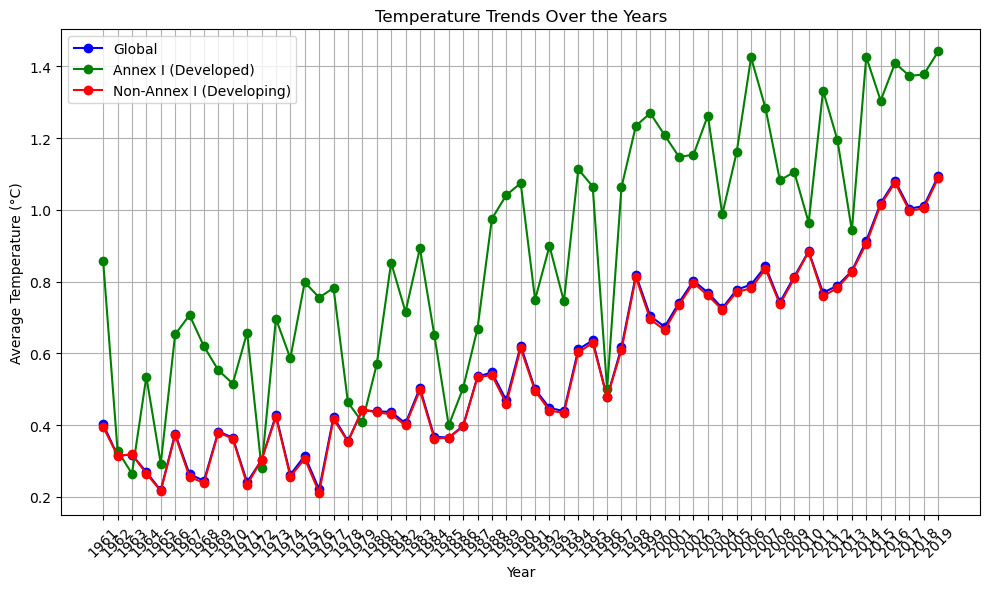

In [18]:
import matplotlib.pyplot as plt

# Plot temperature trends
plt.figure(figsize=(10, 6))

# Plot Global average temperature trend
plt.plot(global_avg_temp.index, global_avg_temp.values, label='Global', color='blue', marker='o')

# Plot Annex I countries average temperature trend
plt.plot(annex_i_avg_temp.index, annex_i_avg_temp.values, label='Annex I (Developed)', color='green', marker='o')

# Plot Non-Annex I countries average temperature trend
plt.plot(non_annex_i_avg_temp.index, non_annex_i_avg_temp.values, label='Non-Annex I (Developing)', color='red', marker='o')

plt.title('Temperature Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


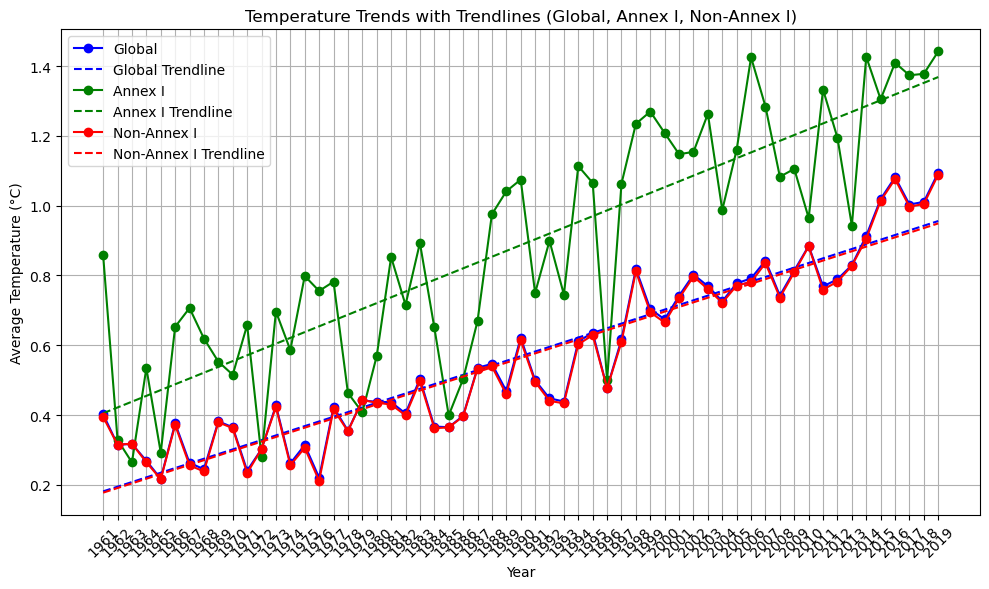

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression (convert years to integers)
years_numeric = np.array(global_avg_temp.index).astype(int).reshape(-1, 1)

# Linear regression model for global temperature
model_global = LinearRegression().fit(years_numeric, global_avg_temp.values)
trendline_global = model_global.predict(years_numeric)

# Linear regression model for Annex I countries
model_annex_i = LinearRegression().fit(years_numeric, annex_i_avg_temp.values)
trendline_annex_i = model_annex_i.predict(years_numeric)

# Linear regression model for Non-Annex I countries
model_non_annex_i = LinearRegression().fit(years_numeric, non_annex_i_avg_temp.values)
trendline_non_annex_i = model_non_annex_i.predict(years_numeric)

# Plot with trendlines
plt.figure(figsize=(10, 6))

# Global temperature trend with trendline
plt.plot(global_avg_temp.index, global_avg_temp.values, label='Global', color='blue', marker='o')
plt.plot(global_avg_temp.index, trendline_global, color='blue', linestyle='--', label='Global Trendline')

# Annex I trend with trendline
plt.plot(annex_i_avg_temp.index, annex_i_avg_temp.values, label='Annex I', color='green', marker='o')
plt.plot(annex_i_avg_temp.index, trendline_annex_i, color='green', linestyle='--', label='Annex I Trendline')

# Non-Annex I trend with trendline
plt.plot(non_annex_i_avg_temp.index, non_annex_i_avg_temp.values, label='Non-Annex I', color='red', marker='o')
plt.plot(non_annex_i_avg_temp.index, trendline_non_annex_i, color='red', linestyle='--', label='Non-Annex I Trendline')

plt.title('Temperature Trends with Trendlines (Global, Annex I, Non-Annex I)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


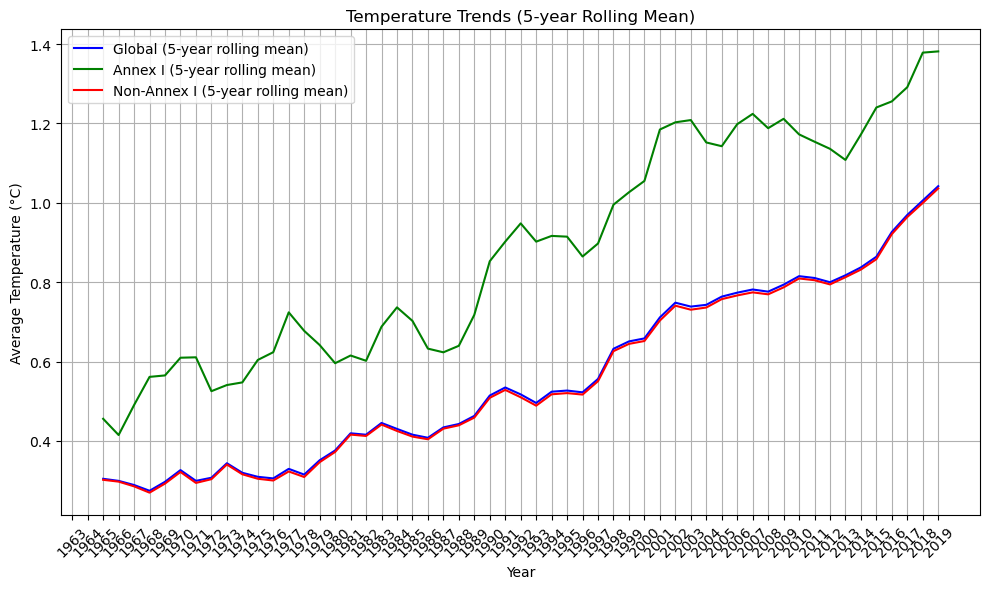

In [20]:
# Calculate a rolling mean for each group (window of 5 years)
rolling_window = 5

global_avg_temp_rolling = global_avg_temp.rolling(window=rolling_window).mean()
annex_i_avg_temp_rolling = annex_i_avg_temp.rolling(window=rolling_window).mean()
non_annex_i_avg_temp_rolling = non_annex_i_avg_temp.rolling(window=rolling_window).mean()

# Plot the rolling averages
plt.figure(figsize=(10, 6))

# Global temperature with rolling mean
plt.plot(global_avg_temp.index, global_avg_temp_rolling, label='Global (5-year rolling mean)', color='blue')

# Annex I with rolling mean
plt.plot(annex_i_avg_temp.index, annex_i_avg_temp_rolling, label='Annex I (5-year rolling mean)', color='green')

# Non-Annex I with rolling mean
plt.plot(non_annex_i_avg_temp.index, non_annex_i_avg_temp_rolling, label='Non-Annex I (5-year rolling mean)', color='red')

plt.title('Temperature Trends (5-year Rolling Mean)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


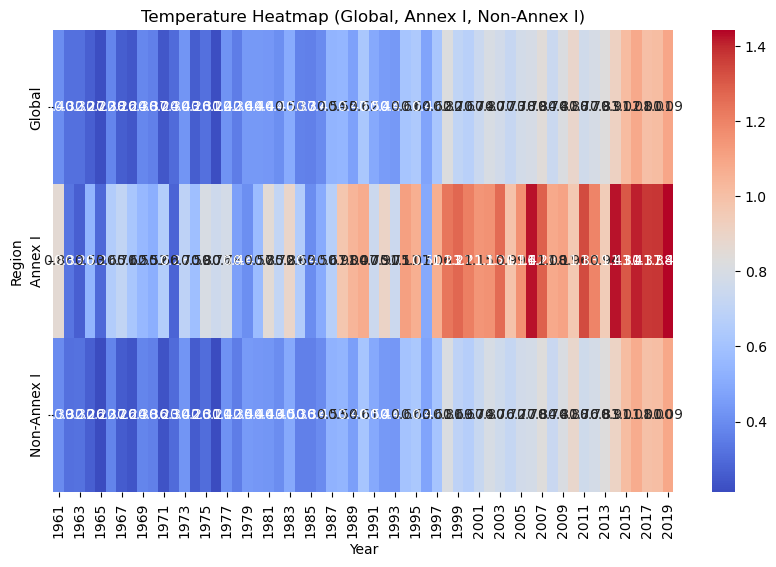

In [21]:
import seaborn as sns

# Prepare data for heatmap
df_heatmap = pd.DataFrame({
    'Year': global_avg_temp.index.astype(int),
    'Global': global_avg_temp.values,
    'Annex I': annex_i_avg_temp.values,
    'Non-Annex I': non_annex_i_avg_temp.values
}).set_index('Year')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap.T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Temperature Heatmap (Global, Annex I, Non-Annex I)')
plt.ylabel('Region')
plt.xlabel('Year')
plt.show()


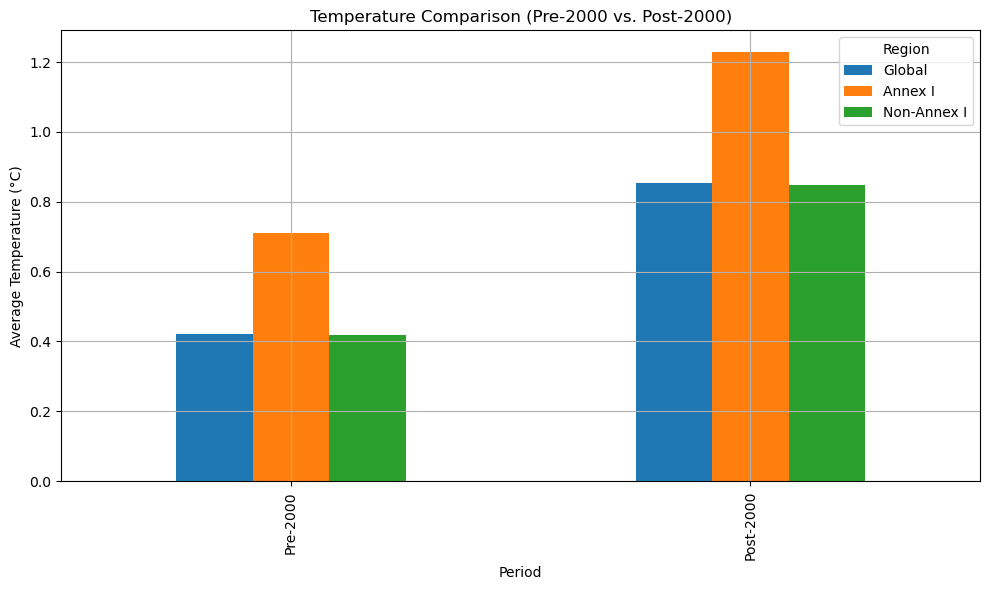

In [22]:
# Split data into pre-2000 and post-2000
pre_2000_years = [year for year in global_avg_temp.index if int(year) < 2000]
post_2000_years = [year for year in global_avg_temp.index if int(year) >= 2000]

pre_2000_avg_global = global_avg_temp.loc[pre_2000_years].mean()
post_2000_avg_global = global_avg_temp.loc[post_2000_years].mean()

pre_2000_avg_annex_i = annex_i_avg_temp.loc[pre_2000_years].mean()
post_2000_avg_annex_i = annex_i_avg_temp.loc[post_2000_years].mean()

pre_2000_avg_non_annex_i = non_annex_i_avg_temp.loc[pre_2000_years].mean()
post_2000_avg_non_annex_i = non_annex_i_avg_temp.loc[post_2000_years].mean()

# Bar plot for pre- and post-2000 comparison
period_comparison = pd.DataFrame({
    'Global': [pre_2000_avg_global, post_2000_avg_global],
    'Annex I': [pre_2000_avg_annex_i, post_2000_avg_annex_i],
    'Non-Annex I': [pre_2000_avg_non_annex_i, post_2000_avg_non_annex_i]
}, index=['Pre-2000', 'Post-2000'])

period_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Temperature Comparison (Pre-2000 vs. Post-2000)')
plt.ylabel('Average Temperature (°C)')
plt.xlabel('Period')
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Cumulative Temperature Change Over Time')

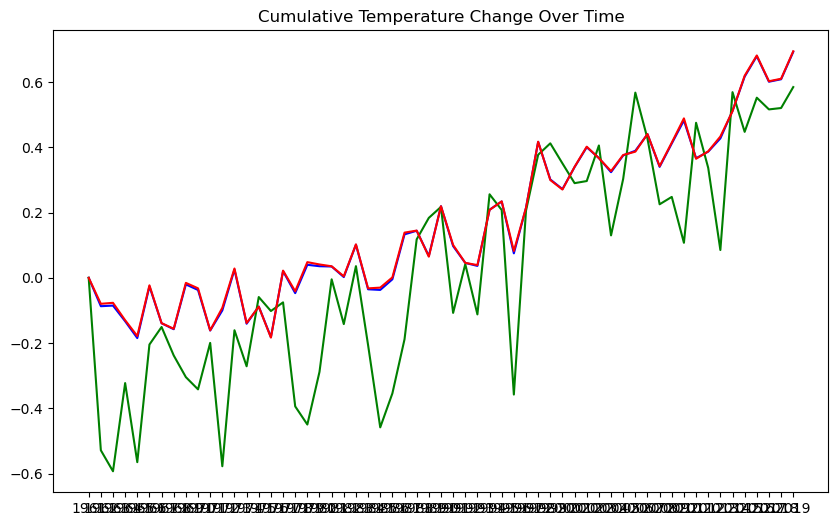

In [23]:
# Calculate cumulative temperature change relative to the first year
cumulative_global = global_avg_temp - global_avg_temp.iloc[0]
cumulative_annex_i = annex_i_avg_temp - annex_i_avg_temp.iloc[0]
cumulative_non_annex_i = non_annex_i_avg_temp - non_annex_i_avg_temp.iloc[0]

# Plot cumulative temperature change
plt.figure(figsize=(10, 6))

plt.plot(cumulative_global.index, cumulative_global.values, label='Global Cumulative Change', color='blue')
plt.plot(cumulative_annex_i.index, cumulative_annex_i.values, label='Annex I Cumulative Change', color='green')
plt.plot(cumulative_non_annex_i.index, cumulative_non_annex_i.values, label='Non-Annex I Cumulative Change', color='red')

plt.title('Cumulative Temperature Change Over Time')


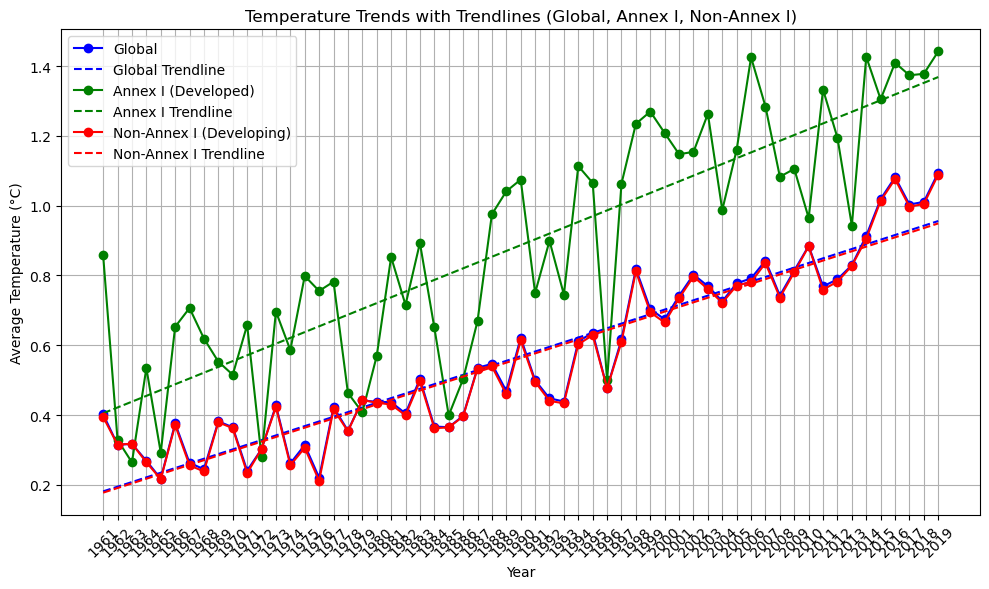

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare data for linear regression (convert years to integers)
years_numeric = np.array(global_avg_temp.index).astype(int).reshape(-1, 1)

# Linear regression model for global temperature
model_global = LinearRegression().fit(years_numeric, global_avg_temp.values)
trendline_global = model_global.predict(years_numeric)

# Linear regression model for Annex I countries
model_annex_i = LinearRegression().fit(years_numeric, annex_i_avg_temp.values)
trendline_annex_i = model_annex_i.predict(years_numeric)

# Linear regression model for Non-Annex I countries
model_non_annex_i = LinearRegression().fit(years_numeric, non_annex_i_avg_temp.values)
trendline_non_annex_i = model_non_annex_i.predict(years_numeric)

# Plot with trendlines
plt.figure(figsize=(10, 6))

# Global temperature trend with trendline
plt.plot(global_avg_temp.index, global_avg_temp.values, label='Global', color='blue', marker='o')
plt.plot(global_avg_temp.index, trendline_global, color='blue', linestyle='--', label='Global Trendline')

# Annex I trend with trendline
plt.plot(annex_i_avg_temp.index, annex_i_avg_temp.values, label='Annex I (Developed)', color='green', marker='o')
plt.plot(annex_i_avg_temp.index, trendline_annex_i, color='green', linestyle='--', label='Annex I Trendline')

# Non-Annex I trend with trendline
plt.plot(non_annex_i_avg_temp.index, non_annex_i_avg_temp.values, label='Non-Annex I (Developing)', color='red', marker='o')
plt.plot(non_annex_i_avg_temp.index, trendline_non_annex_i, color='red', linestyle='--', label='Non-Annex I Trendline')

plt.title('Temperature Trends with Trendlines (Global, Annex I, Non-Annex I)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
pip install pymannkendall


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pymannkendall as mk

# Perform Mann-Kendall test for Global temperatures
global_trend_test = mk.original_test(global_avg_temp.values)
annex_i_trend_test = mk.original_test(annex_i_avg_temp.values)
non_annex_i_trend_test = mk.original_test(non_annex_i_avg_temp.values)

# Print the results
print(f"Global Trend Test: {global_trend_test}")
print(f"Annex I Trend Test: {annex_i_trend_test}")
print(f"Non-Annex I Trend Test: {non_annex_i_trend_test}")


Global Trend Test: Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.710596953962412, Tau=0.7790765634132086, s=1333.0, var_s=23383.666666666668, slope=0.013500497290462241, intercept=0.10817754739196744)
Annex I Trend Test: Mann_Kendall_Test(trend='increasing', h=True, p=7.649436639667329e-13, z=7.167277974131235, Tau=0.6411455289304501, s=1097.0, var_s=23383.666666666668, slope=0.01669591503267974, intercept=0.4090978758169937)
Non-Annex I Trend Test: Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.710596953962412, Tau=0.7790765634132086, s=1333.0, var_s=23383.666666666668, slope=0.01341793859623213, intercept=0.10632202823686226)


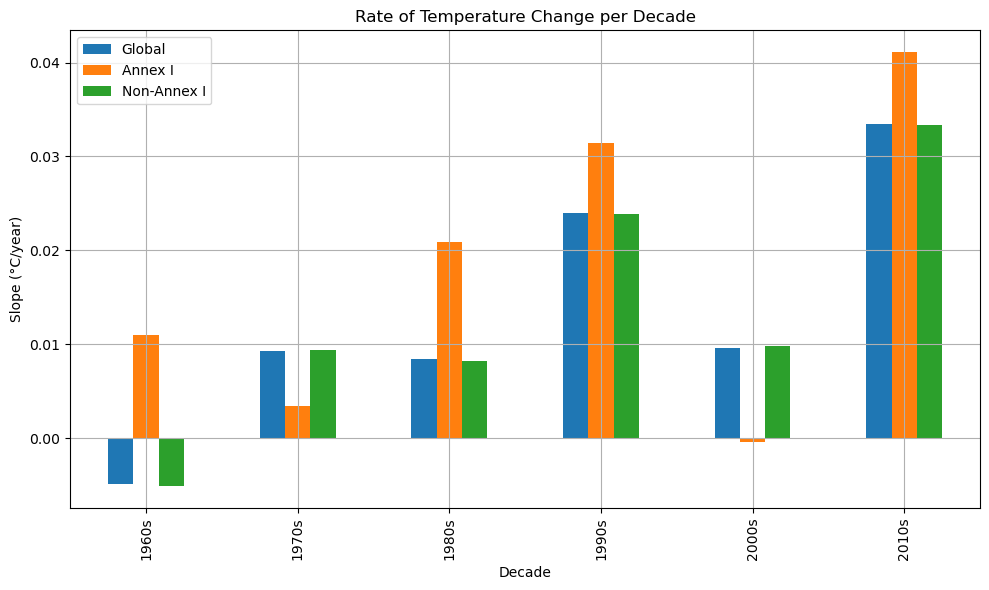

In [29]:
import numpy as np

# Function to calculate slope (rate of change)
def calculate_slope(years, temperatures):
    model = LinearRegression()
    model.fit(np.array(years).reshape(-1, 1), temperatures)
    return model.coef_[0]  # Returns the slope

# Calculate slopes (rate of change) by decade
decades = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
slopes_global = []
slopes_annex_i = []
slopes_non_annex_i = []

for decade in decades:
    start_year = int(decade[:4])
    end_year = start_year + 9
    decade_years = [year for year in global_avg_temp.index if int(year) >= start_year and int(year) <= end_year]
    
    slope_global = calculate_slope([int(year) for year in decade_years], global_avg_temp[decade_years].values)
    slope_annex_i = calculate_slope([int(year) for year in decade_years], annex_i_avg_temp[decade_years].values)
    slope_non_annex_i = calculate_slope([int(year) for year in decade_years], non_annex_i_avg_temp[decade_years].values)
    
    slopes_global.append(slope_global)
    slopes_annex_i.append(slope_annex_i)
    slopes_non_annex_i.append(slope_non_annex_i)

# Create a DataFrame for plotting
df_slopes = pd.DataFrame({
    'Decade': decades,
    'Global': slopes_global,
    'Annex I': slopes_annex_i,
    'Non-Annex I': slopes_non_annex_i
})

# Plot the slopes (rate of temperature change per decade)
df_slopes.set_index('Decade').plot(kind='bar', figsize=(10, 6))
plt.title('Rate of Temperature Change per Decade')
plt.ylabel('Slope (°C/year)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
# Check for missing values in country_temp
print(country_temp.isnull().sum())


Y1961    39
Y1962    39
Y1963    40
Y1964    39
Y1965    39
Y1966    37
Y1967    38
Y1968    37
Y1969    38
Y1970    38
Y1971    37
Y1972    37
Y1973    35
Y1974    35
Y1975    36
Y1976    35
Y1977    37
Y1978    35
Y1979    35
Y1980    35
Y1981    35
Y1982    36
Y1983    37
Y1984    36
Y1985    36
Y1986    36
Y1987    37
Y1988    37
Y1989    37
Y1990    36
Y1991    35
Y1992    18
Y1993    15
Y1994    17
Y1995    16
Y1996    17
Y1997    16
Y1998    16
Y1999    19
Y2000    17
Y2001    22
Y2002    18
Y2003    17
Y2004    18
Y2005    16
Y2006    15
Y2007    15
Y2008    15
Y2009    15
Y2010    15
Y2011    15
Y2012    17
Y2013    16
Y2014    18
Y2015    19
Y2016    18
Y2017    18
Y2018    18
Y2019    18
dtype: int64


In [51]:
# Drop rows with missing values
country_temp_cleaned = country_temp.dropna()

# Apply KMeans clustering to the cleaned data
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(country_temp_cleaned)

# Add cluster labels to the cleaned DataFrame
country_temp_cleaned['Cluster'] = clusters


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Yasemin\AppData\Local\Temp\ipykernel_8856\484366200.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_temp_cleaned['Cluster'] = clusters


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


                   Y1961     Y1962     Y1963     Y1964     Y1965     Y1966  \
Area                                                                         
Afghanistan     0.607853  0.495147  1.038235  0.141059  0.567971  0.704941   
Africa          0.124235  0.165559  0.207471  0.074000  0.071088  0.242088   
Albania         0.781912  0.664765  0.672618  0.446735  0.364500  0.775441   
Algeria         0.559265  0.423088  0.496647  0.436500  0.377059  0.568441   
American Samoa  0.166853  0.128324  0.229559  0.043559 -0.025382  0.247971   

                   Y1967     Y1968     Y1969     Y1970  ...     Y2011  \
Area                                                    ...             
Afghanistan     0.412794  0.419235  0.404941  0.958853  ...  1.216941   
Africa          0.057441  0.077912  0.343882  0.260735  ...  0.615206   
Albania         0.506118  0.575676  0.526412  0.507176  ...  1.114176   
Algeria         0.371912  0.427235  0.499735  0.478147  ...  1.085382   
American Samoa 

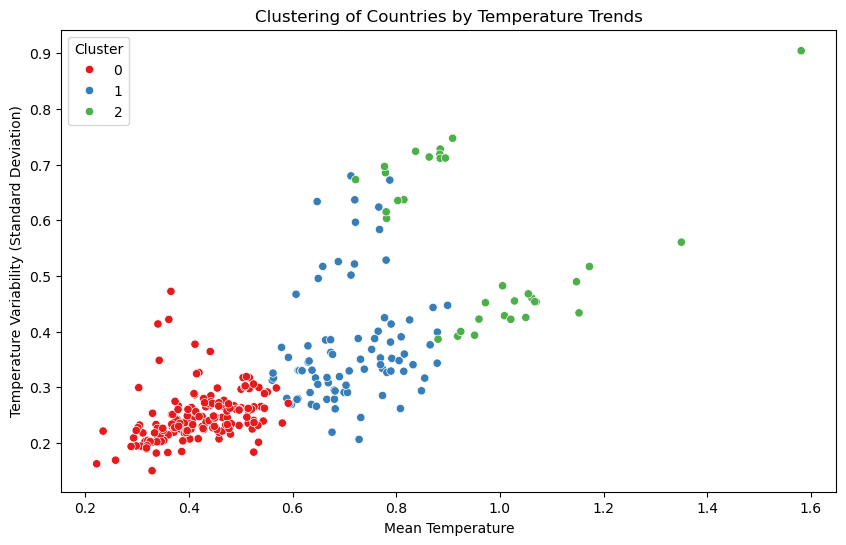


Countries in Cluster 0:
['Africa' 'American Samoa' 'Americas' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Aruba' 'Asia' 'Australia'
 'Australia and New Zealand' 'Bahamas' 'Bangladesh' 'Barbados' 'Belize'
 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei Darussalam' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Caribbean' 'Cayman Islands'
 'Central African Republic' 'Central America' 'Chad' 'Chile'
 'China, Taiwan Province of' 'Christmas Island' 'Cocos (Keeling) Islands'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Cuba'
 "Côte d'Ivoire" 'Democratic Republic of the Congo' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Eastern Africa' 'Ecuador' 'El Salvador'
 'Equatorial Guinea' 'Eswatini' 'Ethiopia PDR' 'Fiji' 'French Guiana'
 'French Polynesia' 'French Southern and Antarctic Territories' 'Gabon'
 'Ghana' 'Grenada' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guyana' 'Haiti'
 'Honduras' 'India' 'Indonesia' 'Jamai

In [52]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` contains the original data and 'Area' refers to country
# Extract temperature data for clustering (e.g., taking average over the years for each country)
country_temp = df.groupby('Area')[years].mean()

# Check for missing values and fill NaNs with the column mean
country_temp_filled = country_temp.fillna(country_temp.mean())

# Apply KMeans clustering (assuming we want 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(country_temp_filled)

# Add cluster labels to the DataFrame
country_temp_filled['Cluster'] = clusters

# Verify the 'Cluster' column was added correctly
print(country_temp_filled.head())  # Check if 'Cluster' column exists

# Plot clusters with seaborn (each cluster in a different color)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=country_temp_filled.mean(axis=1), y=country_temp_filled.std(axis=1), hue=country_temp_filled['Cluster'], palette='Set1')
plt.title('Clustering of Countries by Temperature Trends')
plt.xlabel('Mean Temperature')
plt.ylabel('Temperature Variability (Standard Deviation)')
plt.legend(title="Cluster")
plt.show()

# Explanation for Clusters
for cluster in range(3):
    print(f"\nCountries in Cluster {cluster}:")
    print(country_temp_filled[country_temp_filled['Cluster'] == cluster].index.values)




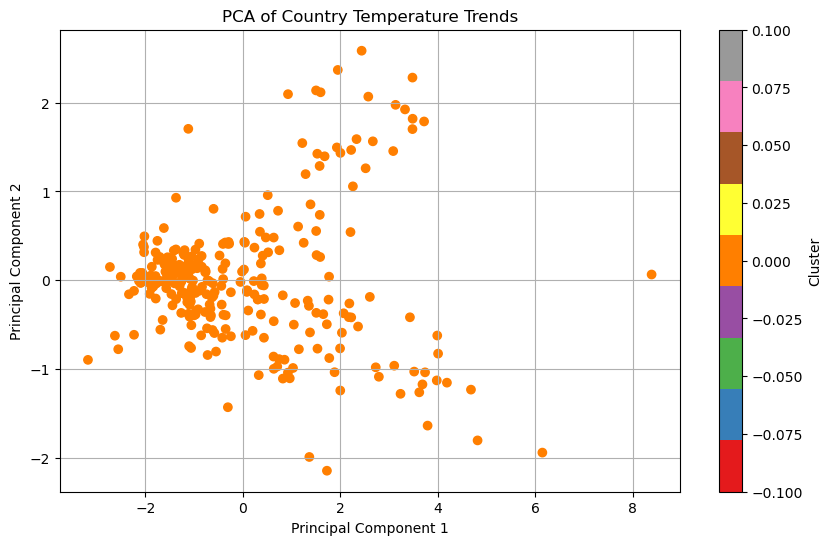

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fill NaN values with the mean of each column in country_temp
country_temp_filled = country_temp.fillna(country_temp.mean())

# Perform PCA on the filled temperature data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(country_temp_filled)

# Use the KMeans cluster labels for coloring the PCA plot if KMeans has been applied
if 'Cluster' in country_temp_filled.columns:
    cluster_labels = country_temp_filled['Cluster']
else:
    cluster_labels = np.zeros(len(country_temp_filled))  # default to 0 if no clusters exist

# Create a scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='Set1')
plt.title('PCA of Country Temperature Trends')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()



<Figure size 1000x600 with 0 Axes>

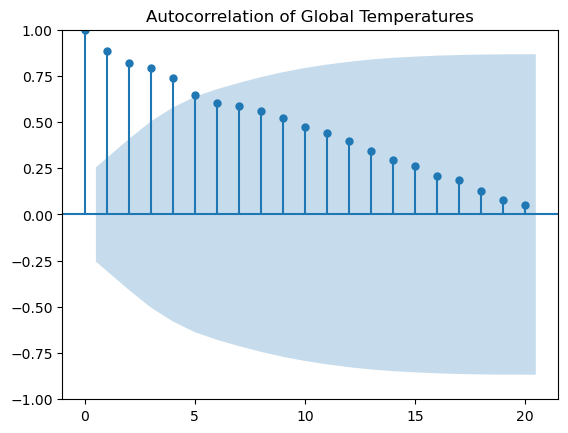

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation for global temperature data
plt.figure(figsize=(10, 6))
plot_acf(global_avg_temp.values, lags=20, title='Autocorrelation of Global Temperatures')
plt.show()
